In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import rpy2.rinterface
import seaborn as sb
from sksurv.nonparametric import kaplan_meier_estimator
import numpy as np

sb.set()
%load_ext rpy2.ipython

pd.set_option('display.max_columns', 500)

In [2]:
table = pd.read_csv("./all_phase2_target_2018_pub_clinical_data.csv")

In [3]:
#ALL clinic data
table.tail()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Diagnosis Age (days),Alternative Therapy Given,Other Alternative Therapy Given,Analysis Cohort,BCR ABL1 Status,Bone Marrow Blasts Day 15,Bone Marrow Blasts Day 29,Bone Marrow Blasts Day 43,Bone Marrow Blasts Day 8,Bone Marrow Site of Relapse,Cancer Type,Cancer Type Detailed,Cell of tumor origin,CNS Site of Relapse,CNS Status,Congenital Abnormality,Death from Initial Pathologic Diagnosis Date,Time To Event (days),DNA Index,Ethnicity Category,ETV6-RUNX1 Fusion Status,First Event,Fraction Genome Altered,Karyotype,MLL Status,Molecular Subtype,MRD Percentage at end of Consolidation,MRD Percentage at end of Consolidation Sensitivity,MRD Percentage Day 29,MRD Percentage Day 29 Sensitivity,MRD Percentage Day 43,MRD Percentage Day 43 Sensitivity,MRD Percentage Day 8,MRD Percentage Day 8 Sensitivity,Mutation Count,Oncotree Code,Overall Survival Days,Overall Survival (Months),Overall Survival Status,Other Site of Relapse,Protocol,Race Category,Number of Samples Per Patient,Sex,TCF3-PBX1 Status,Testes Site of Relapse,Testicular Involvement,Trisomy 4_10,WBC
1973,all_phase2_target_2018_pub,TARGET-10-PAUCDC,TARGET-10-PAUCDC-09,17.0,6151.0,Chemotherapy,NaN,VALIDATION,Negative,6.0,1.0,NaN,72.0,No,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma,T Cell ALL,No,CNS 1,No,NaN,1867.0,1.0,Not Hispanic or Latino,Unknown,None,NaN,"46,XY,der(4)t(4;13)(p15;q14),del(6)(q13q21)[17...",Negative,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,BLL,1867.0,62,LIVING,No,AALL0434,White,1,Male,Negative,No,No,Negative,628.8
1974,all_phase2_target_2018_pub,TARGET-10-PAUCDY,TARGET-10-PAUCDY-09,10.0,3632.0,NaN,NaN,VALIDATION,Negative,7.0,4.0,NaN,73.0,No,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma,T Cell ALL,No,CNS 1,No,NaN,1793.0,1.0,Not Hispanic or Latino,Negative,None,NaN,"46,XY[25]",Negative,NaN,NaN,NaN,4.80,0.01,NaN,NaN,NaN,NaN,NaN,BLL,1793.0,59,LIVING,No,AALL0434,White,1,Male,Negative,No,No,Negative,2.2
1975,all_phase2_target_2018_pub,TARGET-10-PAUXZX,TARGET-10-PAUXZX-60.1,6.0,1828.0,NaN,NaN,XENOGRAFT,Negative,NaN,0.0,NaN,NaN,NaN,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma,B Cell ALL,NaN,CNS 1,No,NaN,NaN,1.0,Not Hispanic or Latino,Positive,NaN,NaN,"46,XX,t(9;12)(q34;p13)[18]/46,XX[2]",Negative,NaN,NaN,NaN,0.06,0.01,NaN,NaN,1.4,0.01,NaN,BLL,NaN,NaN,NaN,NaN,AALL1131,White,3,Female,Negative,NaN,NaN,Negative,322.2
1976,all_phase2_target_2018_pub,TARGET-10-PAUXZX,TARGET-10-PAUXZX-60.2,6.0,1828.0,NaN,NaN,XENOGRAFT,Negative,NaN,0.0,NaN,NaN,NaN,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma,B Cell ALL,NaN,CNS 1,No,NaN,NaN,1.0,Not Hispanic or Latino,Positive,NaN,NaN,"46,XX,t(9;12)(q34;p13)[18]/46,XX[2]",Negative,NaN,NaN,NaN,0.06,0.01,NaN,NaN,1.4,0.01,NaN,BLL,NaN,NaN,NaN,NaN,AALL1131,White,3,Female,Negative,NaN,NaN,Negative,322.2
1977,all_phase2_target_2018_pub,TARGET-10-PAUXZX,TARGET-10-PAUXZX-60.3,6.0,1828.0,NaN,NaN,XENOGRAFT,Negative,NaN,0.0,NaN,NaN,NaN,B-Lymphoblastic Leukemia/Lymphoma,B-Lymphoblastic Leukemia/Lymphoma,B Cell ALL,NaN,CNS 1,No,NaN,NaN,1.0,Not Hispanic or Latino,Positive,NaN,NaN,"46,XX,t(9;12)(q34;p13)[18]/46,XX[2]",Negative,NaN,NaN,NaN,0.06,0.01,NaN,NaN,1.4,0.01,NaN,BLL,NaN,NaN,NaN,NaN,AALL1131,White,3,Female,Negative,NaN,NaN,Negative,322.2


In [4]:
#MRD Day 29 base

#low risk  group
m = table['ETV6-RUNX1 Fusion Status'] == 'Positive'
mx = table['ETV6-RUNX1 Fusion Status'] == 'Negative'
t = table['Trisomy 4_10'] == 'Positive'
tx = table['Trisomy 4_10'] == 'Negative'

#high risk  group
mll = table['MLL Status'] == 'Positive'
tcf = table['TCF3-PBX1 Status'] == 'Positive'
bcr = table['BCR ABL1 Status'] == 'Positive'

m2 = table['Diagnosis Age (days)'] <= 3650

rx = table['First Event'] == 'None'
r1 = table['Bone Marrow Site of Relapse'] == 'Yes'
r2 = table['CNS Site of Relapse'] == 'Yes'
r3 = table['Testes Site of Relapse'] == 'Yes'
r4 = table['Other Site of Relapse'] == 'Yes'
rm = table['First Event'] == 'Relapse'
rs = table['First Event'] == 'SMN'
rp = table['First Event'] == 'Progression'

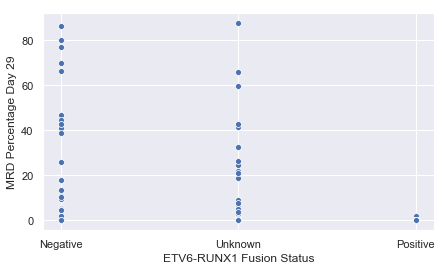

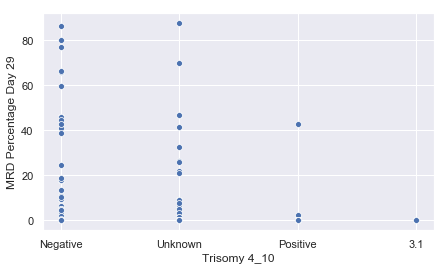

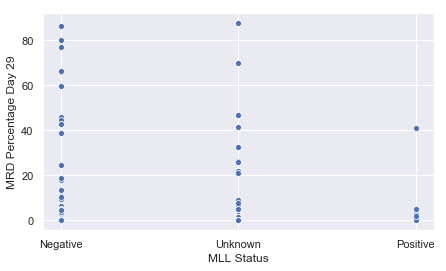

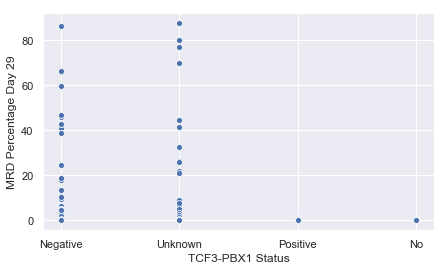

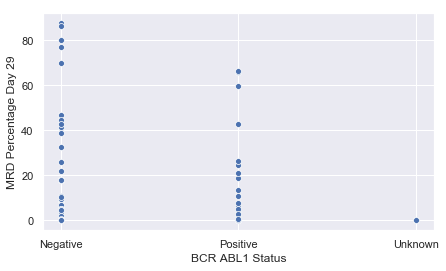

In [5]:
plt.subplots(figsize = (7, 4))
sb.scatterplot(table['ETV6-RUNX1 Fusion Status'], table['MRD Percentage Day 29'])

plt.subplots(figsize = (7, 4))
sb.scatterplot(table['Trisomy 4_10'], table['MRD Percentage Day 29'])

plt.subplots(figsize = (7, 4))
sb.scatterplot(table['MLL Status'], table['MRD Percentage Day 29'])

plt.subplots(figsize = (7, 4))
sb.scatterplot(table['TCF3-PBX1 Status'], table['MRD Percentage Day 29'])

plt.subplots(figsize = (7, 4))
sb.scatterplot(table['BCR ABL1 Status'], table['MRD Percentage Day 29'])

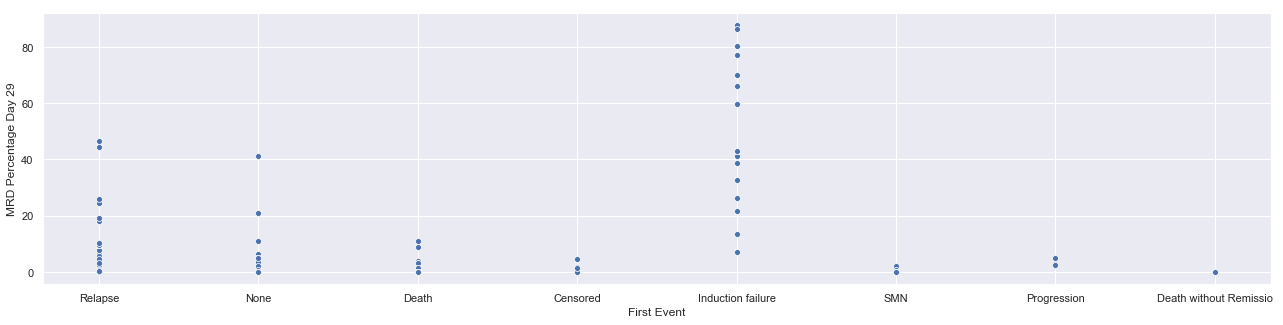

In [6]:
plt.subplots(figsize = (22,5))
sb.scatterplot(table['First Event'], table['MRD Percentage Day 29'])

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


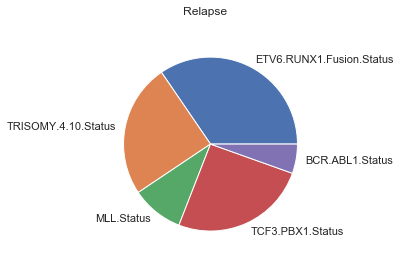

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


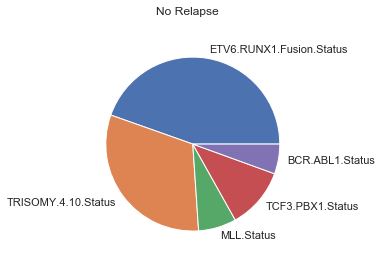

In [7]:
label = ['ETV6.RUNX1.Fusion.Status', 'TRISOMY.4.10.Status', 'MLL.Status', 'TCF3.PBX1.Status', 'BCR.ABL1.Status']
ratio = [len(table[rm][m]), len(table[rm][t]), len(table[rm][mll]), len(table[rm][tcf]), len(table[rm][bcr])]
plt.subplots()
plt.pie(ratio, labels = label)
plt.suptitle('Relapse')
plt.show()

label = ['ETV6.RUNX1.Fusion.Status', 'TRISOMY.4.10.Status', 'MLL.Status', 'TCF3.PBX1.Status', 'BCR.ABL1.Status']
ratio = [len(table[rx][m]), len(table[rx][t]), len(table[rx][mll]), len(table[rx][tcf]), len(table[rx][bcr])]
plt.subplots()
plt.pie(ratio, labels = label)
plt.suptitle('No Relapse')
plt.show()

* ETV6 n=17 / TCF3 n=19 >>> all Relapse
* BCR n=5 >>> None, Relapse, Decrease
* MLL n=3 >>> None, Relapse
* Trisomy n=17 >>> None, Relapse, SMN

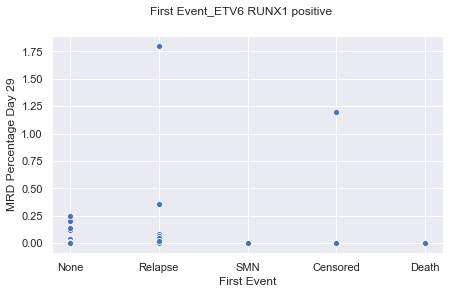

************************************************************


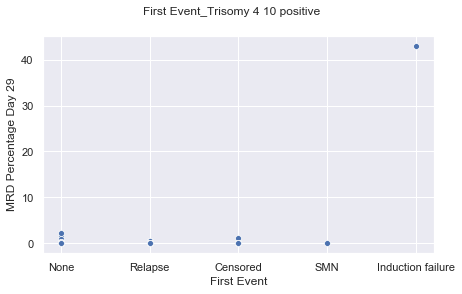

************************************************************


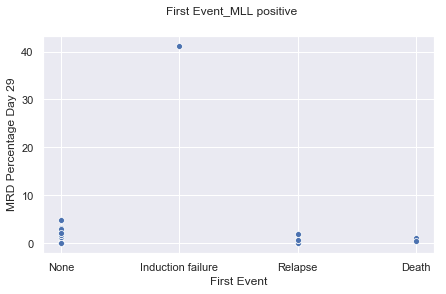

************************************************************


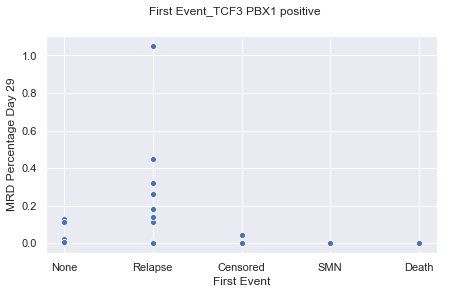

************************************************************


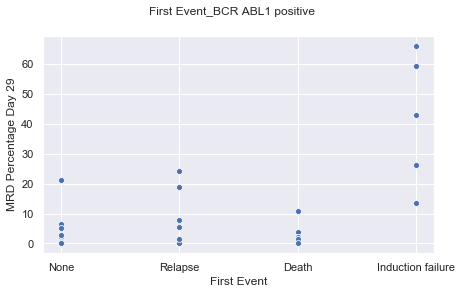

************************************************************


In [8]:
plt.subplots(figsize = (7, 4))
sb.scatterplot(table[m]['First Event'], table['MRD Percentage Day 29'])
plt.suptitle('First Event_ETV6 RUNX1 positive')
plt.show()
print('*'*60)

plt.subplots(figsize = (7, 4))
sb.scatterplot(table[t]['First Event'], table['MRD Percentage Day 29'])
plt.suptitle('First Event_Trisomy 4 10 positive')
plt.show()
print('*'*60)

plt.subplots(figsize = (7, 4))
sb.scatterplot(table[mll]['First Event'], table['MRD Percentage Day 29'])
plt.suptitle('First Event_MLL positive')
plt.show()
print('*'*60)

plt.subplots(figsize = (7, 4))
sb.scatterplot(table[tcf]['First Event'], table['MRD Percentage Day 29'])
plt.suptitle('First Event_TCF3 PBX1 positive')
plt.show()
print('*'*60)

plt.subplots(figsize = (7, 4))
sb.scatterplot(table[bcr]['First Event'], table['MRD Percentage Day 29'])
plt.suptitle('First Event_BCR ABL1 positive')
plt.show()
print('*'*60)

In [9]:
table2 = table[(table['Overall Survival Status'] == 'DECEASED') | (table['Overall Survival Status'] == 'LIVING')]

In [10]:
table2['Overall Survival Status'] = table2['Overall Survival Status'] == 'DECEASED'

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
days = table2['Overall Survival Days'] > 1
table2 = table2[days]

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-pa

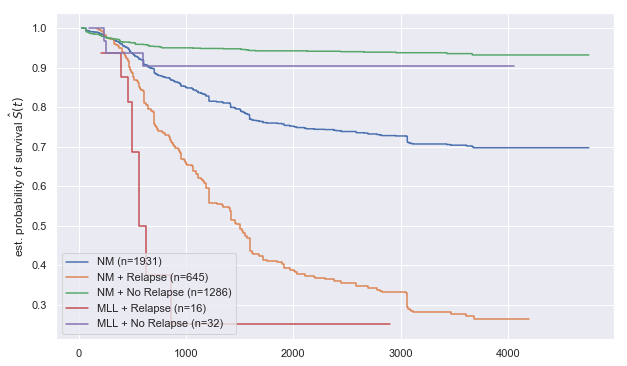

In [12]:
plt.subplots(figsize = (10, 6))

time, survival_prob = kaplan_meier_estimator(table2["Overall Survival Status"], table2["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'NM (n=%d)' %(len(table2["Overall Survival Status"])))
time, survival_prob = kaplan_meier_estimator(table2[rm]["Overall Survival Status"], table2[rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'NM + Relapse (n=%d)' %(len(table2[rm]["Overall Survival Status"])))
time, survival_prob = kaplan_meier_estimator(table2[-rm]["Overall Survival Status"], table2[-rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'NM + No Relapse (n=%d)' %(len(table2[-rm]["Overall Survival Status"])))

time, survival_prob = kaplan_meier_estimator(table2[mll][rm]["Overall Survival Status"], table2[mll][rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'MLL + Relapse (n=%d)' %(len(table2[mll][rm]["Overall Survival Status"])))
time, survival_prob = kaplan_meier_estimator(table2[mll][-rm]["Overall Survival Status"], table2[mll][-rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'MLL + No Relapse (n=%d)' %(len(table2[mll][-rm]["Overall Survival Status"])))

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.legend(loc="best")

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-pa

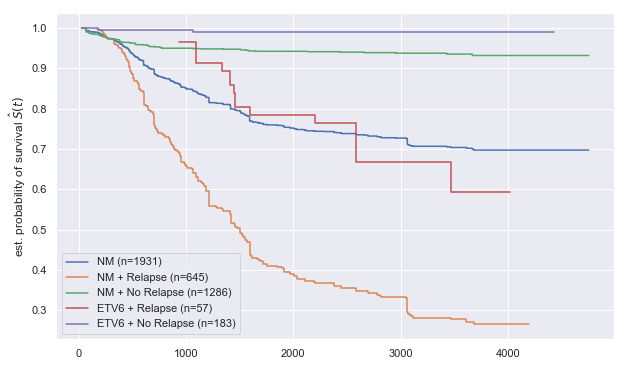

In [13]:
plt.subplots(figsize = (10, 6))

time, survival_prob = kaplan_meier_estimator(table2["Overall Survival Status"], table2["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'NM (n=%d)' %(len(table2["Overall Survival Status"])))
time, survival_prob = kaplan_meier_estimator(table2[rm]["Overall Survival Status"], table2[rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'NM + Relapse (n=%d)' %(len(table2[rm]["Overall Survival Status"])))
time, survival_prob = kaplan_meier_estimator(table2[-rm]["Overall Survival Status"], table2[-rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'NM + No Relapse (n=%d)' %(len(table2[-rm]["Overall Survival Status"])))

time, survival_prob = kaplan_meier_estimator(table2[m][rm]["Overall Survival Status"], table2[m][rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'ETV6 + Relapse (n=%d)' %(len(table2[m][rm]["Overall Survival Status"])))
time, survival_prob = kaplan_meier_estimator(table2[m][-rm]["Overall Survival Status"], table2[m][-rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'ETV6 + No Relapse (n=%d)' %(len(table2[m][-rm]["Overall Survival Status"])))

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.legend(loc="best")

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bioinfo205_01\Anaconda3\lib\site-pa

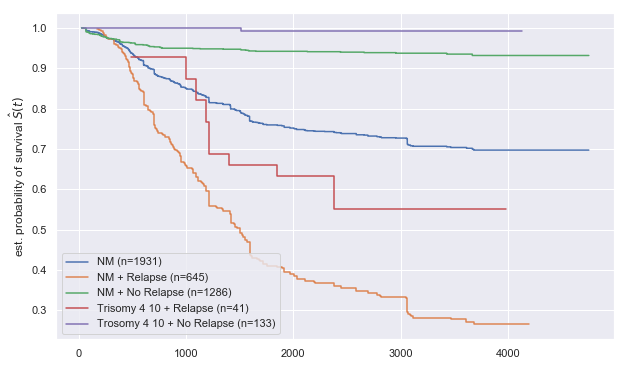

In [14]:
plt.subplots(figsize = (10, 6))

time, survival_prob = kaplan_meier_estimator(table2["Overall Survival Status"], table2["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'NM (n=%d)' %(len(table2["Overall Survival Status"])))
time, survival_prob = kaplan_meier_estimator(table2[rm]["Overall Survival Status"], table2[rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'NM + Relapse (n=%d)' %(len(table2[rm]["Overall Survival Status"])))
time, survival_prob = kaplan_meier_estimator(table2[-rm]["Overall Survival Status"], table2[-rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'NM + No Relapse (n=%d)' %(len(table2[-rm]["Overall Survival Status"])))

time, survival_prob = kaplan_meier_estimator(table2[t][rm]["Overall Survival Status"], table2[t][rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'Trisomy 4 10 + Relapse (n=%d)' %(len(table2[t][rm]["Overall Survival Status"])))
time, survival_prob = kaplan_meier_estimator(table2[t][-rm]["Overall Survival Status"], table2[t][-rm]["Overall Survival Days"])
plt.step(time, survival_prob, where="post", label = 'Trosomy 4 10 + No Relapse (n=%d)' %(len(table2[t][-rm]["Overall Survival Status"])))

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.legend(loc="best")

In [15]:
#miRNA
mirna = pd.read_csv('./data_expression_miRNA.txt', sep = '\t', header=None)
mirna.index = mirna.iloc[:,0]
mirna_t = mirna.T[1:]

mirna_t.head()

,Hugo_Symbol,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,hsa-mir-1471,hsa-mir-147a,hsa-mir-147b,hsa-mir-148a,hsa-mir-148b,hsa-mir-149,hsa-mir-150,hsa-mir-151a,hsa-mir-151b,hsa-mir-152,hsa-mir-153-1,hsa-mir-153-2,hsa-mir-1537,hsa-mir-1538,hsa-mir-1539,hsa-mir-154,hsa-mir-155,hsa-mir-1587,hsa-mir-15a,hsa-mir-15b,hsa-mir-16-1,hsa-mir-16-2,hsa-mir-17,hsa-mir-181a-1,hsa-mir-181a-2,hsa-mir-181b-1,hsa-mir-181b-2,hsa-mir-181c,hsa-mir-181d,hsa-mir-182,hsa-mir-1825,hsa-mir-1827,hsa-mir-183,hsa-mir-184,hsa-mir-185,hsa-mir-186,hsa-mir-187,hsa-mir-188,hsa-mir-18a,hsa-mir-18b,hsa-mir-1908,hsa-mir-1909,hsa-mir-190a,hsa-mir-190b,hsa-mir-191,hsa-mir-1910,hsa-mir-1911,hsa-mir-1912,hsa-mir-1913,hsa-mir-1914,hsa-mir-1915,hsa-mir-192,hsa-mir-193a,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-6823,hsa-mir-6824,hsa-mir-6825,hsa-mir-6826,hsa-mir-6827,hsa-mir-6828,hsa-mir-6829,hsa-mir-6830,hsa-mir-6831,hsa-mir-6832,hsa-mir-6833,hsa-mir-6834,hsa-mir-6835,hsa-mir-6836,hsa-mir-6837,hsa-mir-6838,hsa-mir-6839,hsa-mir-6840,hsa-mir-6841,hsa-mir-6842,hsa-mir-6843,hsa-mir-6844,hsa-mir-6845,hsa-mir-6846,hsa-mir-6847,hsa-mir-6848,hsa-mir-6849,hsa-mir-6850,hsa-mir-6851,hsa-mir-6852,hsa-mir-6853,hsa-mir-6854,hsa-mir-6855,hsa-m

In [16]:
#merge
table = pd.merge(table, mirna_t, left_on = 'Sample ID', right_on = 'Hugo_Symbol')

In [17]:
table.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Diagnosis Age (days),Alternative Therapy Given,Other Alternative Therapy Given,Analysis Cohort,BCR ABL1 Status,Bone Marrow Blasts Day 15,Bone Marrow Blasts Day 29,Bone Marrow Blasts Day 43,Bone Marrow Blasts Day 8,Bone Marrow Site of Relapse,Cancer Type,Cancer Type Detailed,Cell of tumor origin,CNS Site of Relapse,CNS Status,Congenital Abnormality,Death from Initial Pathologic Diagnosis Date,Time To Event (days),DNA Index,Ethnicity Category,ETV6-RUNX1 Fusion Status,First Event,Fraction Genome Altered,Karyotype,MLL Status,Molecular Subtype,MRD Percentage at end of Consolidation,MRD Percentage at end of Consolidation Sensitivity,MRD Percentage Day 29,MRD Percentage Day 29 Sensitivity,MRD Percentage Day 43,MRD Percentage Day 43 Sensitivity,MRD Percentage Day 8,MRD Percentage Day 8 Sensitivity,Mutation Count,Oncotree Code,Overall Survival Days,Overall Survival (Months),Overall Survival Status,Other Site of Relapse,Protocol,Race Category,Number of Samples Per Patient,Sex,TCF3-PBX1 Status,Testes Site of Relapse,Testicular Involvement,Trisomy 4_10,WBC,Hugo_Symbol,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-

In [18]:
table.to_csv('./clinical.csv')

PermissionError: [Errno 13] Permission denied: './clinical.csv'

In [19]:
table = pd.read_csv('./clinical.csv')

In [20]:
table.head()

,Unnamed: 0,Study ID,Patient ID,Sample ID,Diagnosis Age,Diagnosis Age (days),Alternative Therapy Given,Other Alternative Therapy Given,Analysis Cohort,BCR ABL1 Status,Bone Marrow Blasts Day 15,Bone Marrow Blasts Day 29,Bone Marrow Blasts Day 43,Bone Marrow Blasts Day 8,Bone Marrow Site of Relapse,Cancer Type,Cancer Type Detailed,Cell of tumor origin,CNS Site of Relapse,CNS Status,Congenital Abnormality,Death from Initial Pathologic Diagnosis Date,Time To Event (days),DNA Index,Ethnicity Category,ETV6-RUNX1 Fusion Status,First Event,Fraction Genome Altered,Karyotype,MLL Status,Molecular Subtype,MRD Percentage at end of Consolidation,MRD Percentage at end of Consolidation Sensitivity,MRD Percentage Day 29,MRD Percentage Day 29 Sensitivity,MRD Percentage Day 43,MRD Percentage Day 43 Sensitivity,MRD Percentage Day 8,MRD Percentage Day 8 Sensitivity,Mutation Count,Oncotree Code,Overall Survival Days,Overall Survival (Months),Overall Survival Status,Other Site of Relapse,Protocol,Race Category,Number of Samples Per Patient,Sex,TCF3-PBX1 Status,Testes Site of Relapse,Testicular Involvement,Trisomy 4_10,WBC,Hugo_Symbol,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-68

In [21]:
###table.iloc[:,54:]

In [22]:
#MRD Day 29
m = table['ETV6-RUNX1 Fusion Status'] == 'Positive'
mx = table['ETV6-RUNX1 Fusion Status'] == 'Negative'
t = table['Trisomy 4_10'] == 'Positive'
mll = table['MLL Status'] == 'Positive'
tcf = table['TCF3-PBX1 Status'] == 'Positive'
bcr = table['BCR ABL1 Status'] == 'Positive'

m2 = table['Diagnosis Age (days)'] <= 3650

rx = table['First Event'] == 'None'
r1 = table['Bone Marrow Site of Relapse'] == 'Yes'
r2 = table['CNS Site of Relapse'] == 'Yes'
r3 = table['Testes Site of Relapse'] == 'Yes'
r4 = table['Other Site of Relapse'] == 'Yes'
rm = table['First Event'] == 'Relapse'
rs = table['First Event'] == 'SMN'
rp = table['First Event'] == 'Progression'

In [23]:
print(
    'ETV6 RUNX1', table[m]['First Event'].unique(), '\n',
    'Trisomy', table[t]['First Event'].unique(), '\n',
    'MLL', table[mll]['First Event'].unique(), '\n',
    'TCF3', table[tcf]['First Event'].unique(), '\n',
    'BCR', table[bcr]['First Event'].unique(), '\n'
)

ETV6 RUNX1 ['Relapse'] 
 Trisomy ['None' 'Relapse' 'SMN'] 
 MLL ['None' 'Relapse'] 
 TCF3 ['Relapse' 'Death'] 
 BCR ['Death' 'Relapse' 'None'] 



In [24]:
table[t]['First Event']

1         None
5         None
11     Relapse
12     Relapse
22        None
49     Relapse
58         SMN
62     Relapse
63     Relapse
65     Relapse
68     Relapse
90        None
109    Relapse
139    Relapse
140    Relapse
148    Relapse
174    Relapse
Name: First Event, dtype: object

In [25]:
temp = table[t].iloc[:,55:]

In [26]:
temp_rm = table[t][rm].iloc[:,55:]

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [27]:
temp_rx = table[t][rx].iloc[:,55:]

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [28]:
temp_rm

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,hsa-mir-1471,hsa-mir-147a,hsa-mir-147b,hsa-mir-148a,hsa-mir-148b,hsa-mir-149,hsa-mir-150,hsa-mir-151a,hsa-mir-151b,hsa-mir-152,hsa-mir-153-1,hsa-mir-153-2,hsa-mir-1537,hsa-mir-1538,hsa-mir-1539,hsa-mir-154,hsa-mir-155,hsa-mir-1587,hsa-mir-15a,hsa-mir-15b,hsa-mir-16-1,hsa-mir-16-2,hsa-mir-17,hsa-mir-181a-1,hsa-mir-181a-2,hsa-mir-181b-1,hsa-mir-181b-2,hsa-mir-181c,hsa-mir-181d,hsa-mir-182,hsa-mir-1825,hsa-mir-1827,hsa-mir-183,hsa-mir-184,hsa-mir-185,hsa-mir-186,hsa-mir-187,hsa-mir-188,hsa-mir-18a,hsa-mir-18b,hsa-mir-1908,hsa-mir-1909,hsa-mir-190a,hsa-mir-190b,hsa-mir-191,hsa-mir-1910,hsa-mir-1911,hsa-mir-1912,hsa-mir-1913,hsa-mir-1914,hsa-mir-1915,hsa-mir-192,hsa-mir-193a,hsa-mir-193b,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-6823,hsa-mir-6824,hsa-mir-6825,hsa-mir-6826,hsa-mir-6827,hsa-mir-6828,hsa-mir-6829,hsa-mir-6830,hsa-mir-6831,hsa-mir-6832,hsa-mir-6833,hsa-mir-6834,hsa-mir-6835,hsa-mir-6836,hsa-mir-6837,hsa-mir-6838,hsa-mir-6839,hsa-mir-6840,hsa-mir-6841,hsa-mir-6842,hsa-mir-6843,hsa-mir-6844,hsa-mir-6845,hsa-mir-6846,hsa-mir-6847,hsa-mir-6848,hsa-mir-6849,hsa-mir-6850,hsa-mir-6851,hsa-mir-6852,hsa-mir-6853,hsa-mir-6854,hsa-mir-6855,hsa-

In [29]:
temp_rx

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,hsa-let-7i,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-103b-2,hsa-mir-105-1,hsa-mir-105-2,hsa-mir-106a,hsa-mir-106b,hsa-mir-107,hsa-mir-10a,hsa-mir-10b,hsa-mir-1178,hsa-mir-1179,hsa-mir-1180,hsa-mir-1181,hsa-mir-1182,hsa-mir-1183,hsa-mir-1184-1,hsa-mir-1184-2,hsa-mir-1184-3,hsa-mir-1185-1,hsa-mir-1185-2,hsa-mir-1193,hsa-mir-1197,hsa-mir-1199,hsa-mir-1200,hsa-mir-1202,hsa-mir-1203,hsa-mir-1204,hsa-mir-1205,hsa-mir-1206,hsa-mir-1207,hsa-mir-1208,hsa-mir-122,hsa-mir-1224,hsa-mir-1225,hsa-mir-1226,hsa-mir-1227,hsa-mir-1228,hsa-mir-1229,hsa-mir-1231,hsa-mir-1233-1,hsa-mir-1233-2,hsa-mir-1234,hsa-mir-1236,hsa-mir-1237,hsa-mir-1238,hsa-mir-124-1,hsa-mir-124-2,hsa-mir-124-3,hsa-mir-1243,hsa-mir-1244-1,hsa-mir-1244-2,hsa-mir-1244-3,hsa-mir-1245a,hsa-mir-1245b,hsa-mir-1246,hsa-mir-1247,hsa-mir-1248,hsa-mir-1249,hsa-mir-1250,hsa-mir-1251,hsa-mir-1252,hsa-mir-1253,hsa-mir-1254-1,hsa-mir-1254-2,hsa-mir-1255a,hsa-mir-1255b-1,hsa-mir-1255b-2,hsa-mir-1256,hsa-mir-1257,hsa-mir-1258,hsa-mir-125a,hsa-mir-125b-1,hsa-mir-125b-2,hsa-mir-126,hsa-mir-1260a,hsa-mir-1260b,hsa-mir-1261,hsa-mir-1262,hsa-mir-1263,hsa-mir-1264,hsa-mir-1265,hsa-mir-1266,hsa-mir-1267,hsa-mir-1268a,hsa-mir-1268b,hsa-mir-1269a,hsa-mir-1269b,hsa-mir-127,hsa-mir-1270-1,hsa-mir-1270-2,hsa-mir-1271,hsa-mir-1272,hsa-mir-1273a,hsa-mir-1273c,hsa-mir-1273d,hsa-mir-1273f,hsa-mir-1273g,hsa-mir-1273h,hsa-mir-1275,hsa-mir-1276,hsa-mir-1277,hsa-mir-1278,hsa-mir-1279,hsa-mir-128-1,hsa-mir-128-2,hsa-mir-1281,hsa-mir-1282,hsa-mir-1283-1,hsa-mir-1283-2,hsa-mir-1284,hsa-mir-1285-1,hsa-mir-1285-2,hsa-mir-1286,hsa-mir-1287,hsa-mir-1288,hsa-mir-1289-1,hsa-mir-1289-2,hsa-mir-129-1,hsa-mir-129-2,hsa-mir-1290,hsa-mir-1291,hsa-mir-1292,hsa-mir-1293,hsa-mir-1294,hsa-mir-1295a,hsa-mir-1295b,hsa-mir-1296,hsa-mir-1297,hsa-mir-1298,hsa-mir-1299,hsa-mir-1301,hsa-mir-1302-1,hsa-mir-1302-10,hsa-mir-1302-11,hsa-mir-1302-2,hsa-mir-1302-3,hsa-mir-1302-4,hsa-mir-1302-5,hsa-mir-1302-6,hsa-mir-1302-7,hsa-mir-1302-8,hsa-mir-1302-9,hsa-mir-1303,hsa-mir-1304,hsa-mir-1305,hsa-mir-1306,hsa-mir-1307,hsa-mir-130a,hsa-mir-130b,hsa-mir-132,hsa-mir-1321,hsa-mir-1322,hsa-mir-1323,hsa-mir-1324,hsa-mir-133a-1,hsa-mir-133a-2,hsa-mir-133b,hsa-mir-134,hsa-mir-1343,hsa-mir-135a-1,hsa-mir-135a-2,hsa-mir-135b,hsa-mir-136,hsa-mir-137,hsa-mir-138-1,hsa-mir-138-2,hsa-mir-139,hsa-mir-140,hsa-mir-141,hsa-mir-142,hsa-mir-143,hsa-mir-144,hsa-mir-145,hsa-mir-1468,hsa-mir-1469,hsa-mir-146a,hsa-mir-146b,hsa-mir-1470,hsa-mir-1471,hsa-mir-147a,hsa-mir-147b,hsa-mir-148a,hsa-mir-148b,hsa-mir-149,hsa-mir-150,hsa-mir-151a,hsa-mir-151b,hsa-mir-152,hsa-mir-153-1,hsa-mir-153-2,hsa-mir-1537,hsa-mir-1538,hsa-mir-1539,hsa-mir-154,hsa-mir-155,hsa-mir-1587,hsa-mir-15a,hsa-mir-15b,hsa-mir-16-1,hsa-mir-16-2,hsa-mir-17,hsa-mir-181a-1,hsa-mir-181a-2,hsa-mir-181b-1,hsa-mir-181b-2,hsa-mir-181c,hsa-mir-181d,hsa-mir-182,hsa-mir-1825,hsa-mir-1827,hsa-mir-183,hsa-mir-184,hsa-mir-185,hsa-mir-186,hsa-mir-187,hsa-mir-188,hsa-mir-18a,hsa-mir-18b,hsa-mir-1908,hsa-mir-1909,hsa-mir-190a,hsa-mir-190b,hsa-mir-191,hsa-mir-1910,hsa-mir-1911,hsa-mir-1912,hsa-mir-1913,hsa-mir-1914,hsa-mir-1915,hsa-mir-192,hsa-mir-193a,hsa-mir-193b,...,hsa-mir-6805,hsa-mir-6806,hsa-mir-6807,hsa-mir-6808,hsa-mir-6809,hsa-mir-6810,hsa-mir-6811,hsa-mir-6812,hsa-mir-6813,hsa-mir-6814,hsa-mir-6815,hsa-mir-6816,hsa-mir-6817,hsa-mir-6818,hsa-mir-6819,hsa-mir-6820,hsa-mir-6821,hsa-mir-6822,hsa-mir-6823,hsa-mir-6824,hsa-mir-6825,hsa-mir-6826,hsa-mir-6827,hsa-mir-6828,hsa-mir-6829,hsa-mir-6830,hsa-mir-6831,hsa-mir-6832,hsa-mir-6833,hsa-mir-6834,hsa-mir-6835,hsa-mir-6836,hsa-mir-6837,hsa-mir-6838,hsa-mir-6839,hsa-mir-6840,hsa-mir-6841,hsa-mir-6842,hsa-mir-6843,hsa-mir-6844,hsa-mir-6845,hsa-mir-6846,hsa-mir-6847,hsa-mir-6848,hsa-mir-6849,hsa-mir-6850,hsa-mir-6851,hsa-mir-6852,hsa-mir-6853,hsa-mir-6854,hsa-mir-6855,hsa-

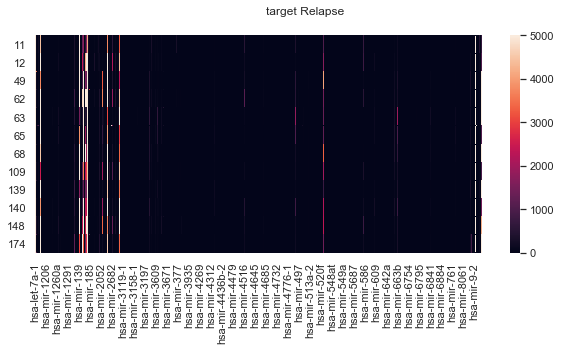

************************************************************


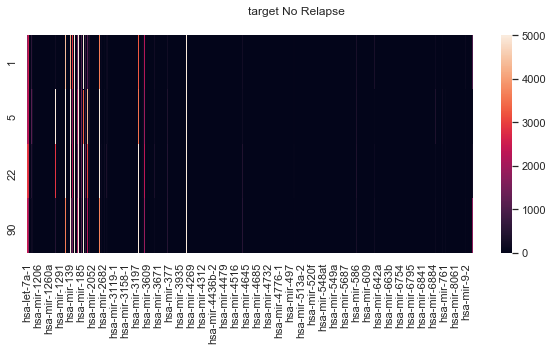

************************************************************


In [30]:
plt.subplots(figsize = (10, 4))
sb.heatmap(temp_rm, vmin = 0, vmax = 5000)
plt.suptitle('target Relapse')
plt.show()
print('*'*60)

plt.subplots(figsize = (10, 4))
sb.heatmap(temp_rx, vmin = 0, vmax = 5000)
plt.suptitle('target No Relapse')
plt.show()
print('*'*60)

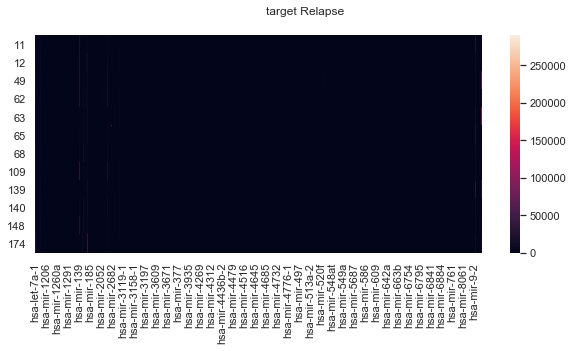

************************************************************


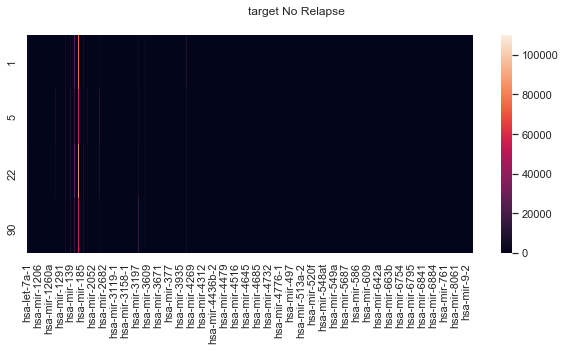

************************************************************


In [31]:
plt.subplots(figsize = (10, 4))
sb.heatmap(temp_rm)
plt.suptitle('target Relapse')
plt.show()
print('*'*60)

plt.subplots(figsize = (10, 4))
sb.heatmap(temp_rx)
plt.suptitle('target No Relapse')
plt.show()
print('*'*60)

In [32]:
temp_rm_log = np.log(temp_rm+0.00001)
temp_rx_log = np.log(temp_rx+0.00001)

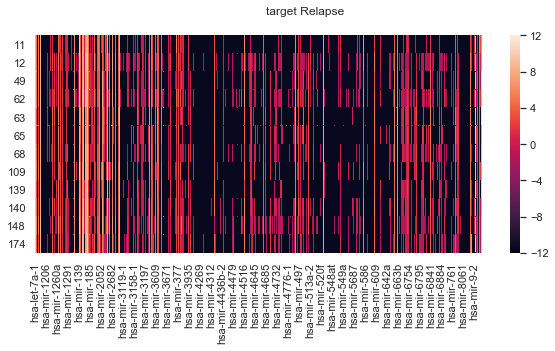

************************************************************


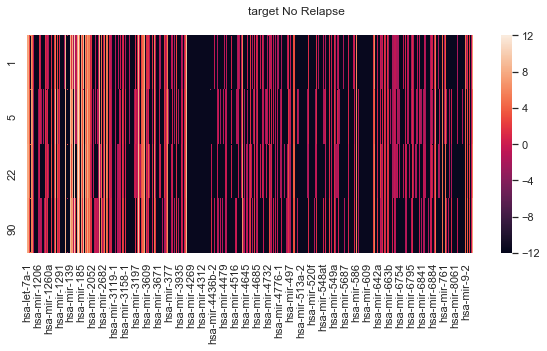

************************************************************


In [33]:
plt.subplots(figsize = (10, 4))
sb.heatmap(temp_rm_log, vmin = -12, vmax = 12)
plt.suptitle('target Relapse')
plt.show()
print('*'*60)

plt.subplots(figsize = (10, 4))
sb.heatmap(temp_rx_log, vmin = -12, vmax = 12)
plt.suptitle('target No Relapse')
plt.show()
print('*'*60)